In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import missingno as mg

%matplotlib inline

### Analyze the dependencies in pypi metadata

In [3]:
data = pd.read_csv('requirements.csv')

In [4]:
data.head(4)

,package,requirement,package_name,package_version
0,02exercicio-1.0.0,NaN,02exercicio,1.0.0
1,0x10c-asm-0.0.2,NaN,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6


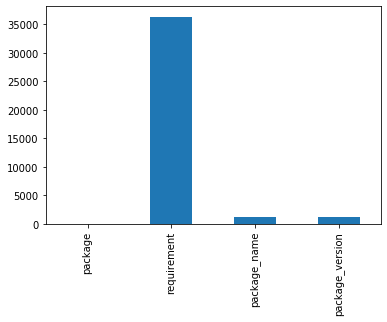

In [5]:
data.isna().sum().plot(kind = 'bar')

In [6]:
missing_data = pd.Series(data.isna().sum(), index
                         = data.columns)

In [7]:
missing_data

package                0
requirement        36331
package_name        1233
package_version     1232
dtype: int64

###  About the networkx package
NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Pygraphviz is a Python interface to the Graphviz graph layout and visualization package. Python language data structures for graphs, digraphs, and multigraphs.

### Creating the nodes and edges from the data

In [8]:
# Nodes and edges
nodes = data.package_name.unique()
edges = data.loc[data.requirement.notnull(), ['package_name', 'requirement']].values

### Graphs

In [78]:
def make_graph(g, min_edges = 0):
    dg = nx.Graph()
    dg.add_nodes_from(g.package_name.unique())
    edges = g.loc[g.requirement.notnull(), ['package_name', 'requirement']].values
    # removing the bad nodes from the above graph objective
    dg.remove_nodes_from(['.','nan',np.nan])
    re_move = [n for n in dg if dg.degree(n)<= min_edges]
    dg.remove_nodes_from(re_move)
    return dg

In [79]:
graph  =make_graph(data, min_edges= 0)

In [77]:
da = nx.barbell_graph(5,0)
c = nx.connected_component_subgraphs(da)
l = list(c)
l = len(l)
print(l)

1


In [84]:
### Community graphs

def edge_toremove(g):
    dict1 =  nx.betweenness_centrality(g)
    list_of_tuples = dict1.items()
    list_of_tuples.sort(key = lambda x: x[1], reverse = True)
    
    return list_of_tuples[0][0]
def girvan(g):
    c =  nx.connected_component_subgraphs(g)
    for subgraph in nx.connected_component_subgraphs(g):
        l = len(subgraph)
        print('no. of components  are ',l)
        while l ==1:
            g.remove_edge(*edge_toremove(g))
            c = nx.connected_component_subgraphs(g)
            for subgraph in nx.connected_component_subgraphs(g):
              
                l = len(subgraph)
                print('no.  of connected components are ', l)
    return 
g = nx.barbell_graph(5,0)
G = girvan(g)

for i in c:
    print(i.nodes())
    print('----------')

no. of components  are  10


In [96]:
dep_graph = nx.DiGraph(dg)

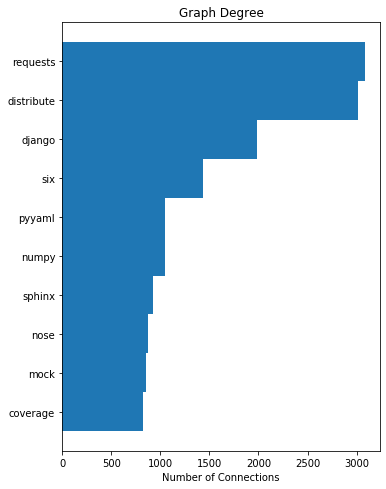

In [100]:
sorted_dict = sorted(dep_graph.in_degree(), key=operator.itemgetter(1))[::-1]

N = 10
x = np.arange(N)
y = np.array([d[1] for d in sorted_dict[:N]])
xlabels = [d[0] for d in sorted_dict[:N]][::-1]
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.barh(x[::-1], y, height=1.0)
ax.set_yticks(x )
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('Number of Connections')
ax.set_title('Graph Degree')
fig.subplots_adjust(left=0.27, bottom=0.1, top=0.95)

# fig.savefig('Figures/Connections.png')

In [101]:
labels = [d[0] for d in sorted_dict[:N]][::-1]
print(labels)

['coverage', 'mock', 'nose', 'sphinx', 'numpy', 'pyyaml', 'six', 'django', 'distribute', 'requests']


In [114]:
graph.add_edges_from(edges)

In [115]:
graph.number_of_edges()

72613

In [117]:
group1 = nx.bfs_tree(graph,"requests")

In [ ]:
nx.draw_networkx(group1)